In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path = "/home/gustavo/Downloads/teste/"

In [5]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs//2, valid_pct = 0.1                              
                                  ).normalize(imagenet_stats)

/home/gustavo/.local/lib/python3.7/site-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
Pandorea
  if getattr(ds, 'warn', False): warn(ds.warn)


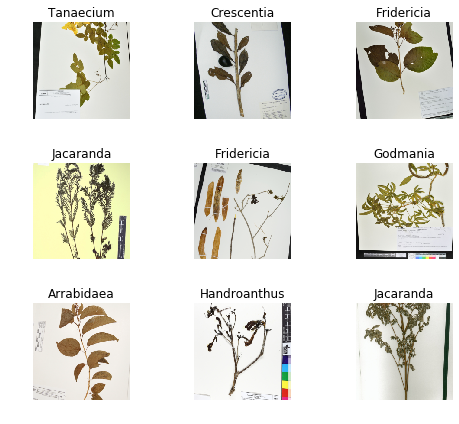

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.273652,2.660664,0.695327,00:36
1,2.516729,2.319776,0.639252,00:34
2,2.183108,2.147719,0.579439,00:35
3,1.935310,2.134284,0.560748,00:35


In [9]:
learn.save('stage-1')

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


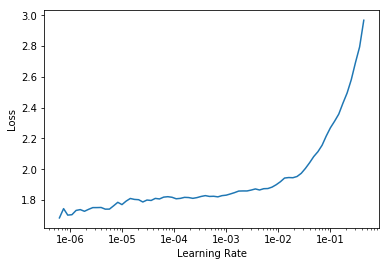

In [9]:
learn.recorder.plot()

In [8]:
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.105996,2.258768,0.603738,00:38
1,2.229288,2.333792,0.622430,00:37
2,1.999722,1.892086,0.521495,00:38
3,1.581838,1.668602,0.471028,00:38
4,1.192838,1.553242,0.459813,00:38


In [13]:
learn.save('stage-2')

In [9]:
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.320424,2.224427,0.555140,00:39
1,1.841133,2.059654,0.558878,00:38
2,1.600736,1.834099,0.517757,00:38
3,1.168784,1.555153,0.442991,00:38
4,0.860262,1.522586,0.433645,00:37


In [16]:
learn.save('corujas')

In [28]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.766213,0.526678,0.145915,01:33
1,0.511770,0.396013,0.108098,01:31


In [29]:
learn.save('stage-3')

In [30]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.629779,0.492748,0.142347,01:32
1,0.451865,0.388197,0.108812,01:32


In [31]:
learn.save("stage-3")

In [32]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.412157,0.480138,0.131288,01:30
1,0.552007,0.504420,0.136639,01:29
2,0.420783,0.435106,0.120585,01:29
3,0.258556,0.392200,0.108098,01:29
4,0.186543,0.383390,0.103104,01:29


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


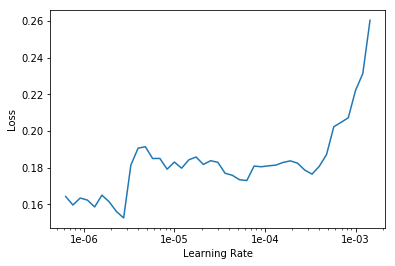

In [33]:
learn.lr_find()
learn.recorder.plot()

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

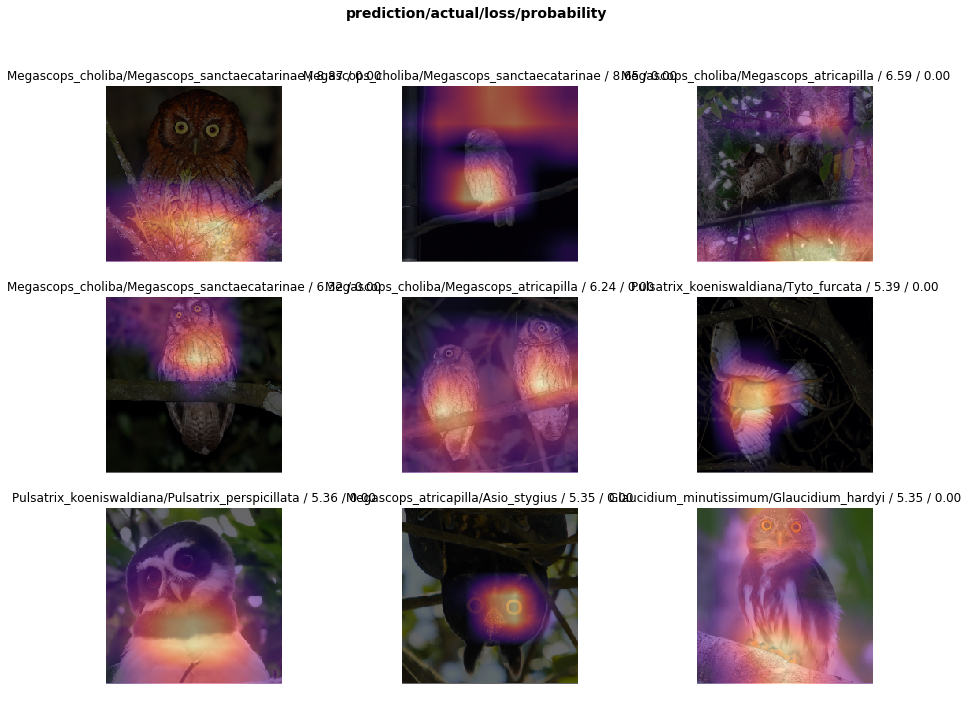

In [20]:
interp.plot_top_losses(9, figsize=(15,11))


In [21]:
print(data.classes)


['Aegolius_harrisii', 'Asio_clamator', 'Asio_flammeus', 'Asio_stygius', 'Athene_cunicularia', 'Bubo_virginianus', 'Glaucidium_brasilianum', 'Glaucidium_hardyi', 'Glaucidium_minutissimum', 'Lophostrix_cristata', 'Megascops_atricapilla', 'Megascops_choliba', 'Megascops_guatemalae', 'Megascops_sanctaecatarinae', 'Megascops_sp.', 'Megascops_usta', 'Megascops_watsonii', 'Pulsatrix_koeniswaldiana', 'Pulsatrix_perspicillata', 'Strix_huhula', 'Strix_hylophila', 'Strix_virgata', 'Tyto_furcata']
